In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class datasetAnalysis:
        # LIBRARIES                         
    import pandas as pd
    import numpy as np

    import collections
    import math

    # from sklearn.datasets.samples_generator import make_blobs
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.preprocessing import MinMaxScaler

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    # from imblearn.over_sampling import SMOTE
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

    from sklearn.metrics import roc_curve,roc_auc_score, auc
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score,f1_score

    #Machine learning algorithms libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    import warnings
    warnings.filterwarnings("ignore")
    
    def __init__(self,data,target):
        self.data=data
        self.target=target

    def datasetInfo1(self):
        
        print( '\033[1m'+ "\n Shape of Dataset :" + '\033[0m',self.data.shape)
        print(self.data.info())
        print(self.data.describe())
        print( '\033[1m'+ "\n General Information of Dataset\n" + '\033[0m',self.data.head())
        print('\033[1m'+ " \n Showing Missing Values\n" + '\033[0m')
        print(self.data.isnull().sum())
        
        
    def datasetInfo2(self):
        print(self.data.columns)
        print("\n" , '\033[1m'+ "Target Counts\n" + '\033[0m', self.data[target].value_counts(),"\n")
        
        for i in data.columns:
            print(data[i].value_counts().head(),"\n")


class PreVisulation:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    def __init__(self,data,feature):
#         self.data=data
#         self.target=target
        self.feature=feature
        self.data=data

    def vis1(self):
        
    #target distribution
        print(data[target].value_counts())
        sns.set(style="darkgrid")
        ax= sns.countplot(y="reason", hue=target, data=data)
        
#         data[target].value_counts().plot("barh")
    def vis2(self): 
        
        data[feature].plot.hist(bins = 20,figsize=(15,7.5))
        
        
        
    def vis3(self): 
        
        
        for i in range(len(self.data.dtypes)):

               
            
            if (self.data.dtypes[i] != "object" and self.data.iloc[:,i].notna().all()):

                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],kde_kws=dict(linewidth=5),bins = 20)
                
            elif (self.data.dtypes[i] == "object" and self.data.iloc[:,i].notna().all()):
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure()
        sns.boxplot(data=self.data)
        

        

In [3]:
class preprocess():
    global train
    global test
    
    
    def __init__(self):
        preprocess.train=pd.DataFrame()
        preprocess.test=pd.DataFrame()
    
    def split(self):
        
        # train-test spit
        preprocess.train, preprocess.test=train_test_split(data, test_size = 0.3, stratify=data[target],random_state = 42) #shuffle=True
        preprocess.train.reset_index(drop=True, inplace=True)
        preprocess.test.reset_index(drop=True, inplace=True)
        
        print("\n", '\033[1m'+ " Train Info" + '\033[0m')
        print(preprocess.train.info())
        print("\n", '\033[1m'+ " Test Info" + '\033[0m')
        print(preprocess.test.info())
        
        
    

In [4]:
hmelq=pd.read_csv("hmelq.csv")
df=hmelq.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [5]:
target='bad'
data=datasetAnalysis(df,target)
data.datasetInfo1()


 Shape of Dataset : (2018, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB
None
               bad          loan        mortdue          value          yoj  \
count  2018.000000   2018.000000    2018.000000    2018.000000  2018.000000   
mean      0.088206  19010.257681   76337.035183  106899.244797

In [6]:
df.job.unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [8]:
df_num = df.select_dtypes(exclude=[np.number])
df_num.columns

Index(['reason', 'job'], dtype='object')

In [9]:
a=df_num.columns
dff=df.copy()
print(a)
for i in a:

    df2_dum = pd.get_dummies(df[i],columns= i, prefix= i)
    print(list(df2_dum.columns))
    dff = pd.concat([dff, df2_dum], axis=1).drop(i,axis=1)

    

Index(['reason', 'job'], dtype='object')
['reason_DebtCon', 'reason_HomeImp']
['job_Mgr', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self']


In [10]:
dff.reset_index(drop=True, inplace=True)

In [11]:
y=dff["bad"]
X=dff.drop(["bad"], axis=1)

In [12]:
X

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
1,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
2,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
3,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
4,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,1,0,0,0,0,0,1
2014,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,1,0,0,0,0,0,1
2015,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,0,0,1
2016,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,1,0,0,0,0,0,1


In [13]:
from scipy.stats import shapiro
from scipy.stats import levene
for col in df.columns[1:]:           #bad hariç
    if df[col].dtypes != object:
        
        stat, p = shapiro(df[col])

        print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print(col)
            print('\033[1m'+ col + '\033[0m','Normal dağılımdan gelmekte (Fail to Reject H0) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Normal dağılımdan gelmemekte (reject H0)\n')

Shapiro Statistics=0.836, p=0.000
loan: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.862, p=0.000
mortdue: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.844, p=0.000
value: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.912, p=0.000
yoj: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.277, p=0.000
derog: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.380, p=0.000
delinq: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.905, p=0.000
clage: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.669, p=0.000
ninq: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.964, p=0.000
clno: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.824, p=0.000
debtinc: Normal dağılımdan gelmemekte (reject H0)



In [14]:
from scipy import stats

# KS testi için hiçbiri normal dağılım sergilemiyor
for col in df.columns[1:]:           #bad hariç
    if df[col].dtypes != object:
        
        p = stats.ks_2samp(df[col][df.bad == 0], df[col][df.bad == 1])[1]

        print('KS Testi  p=%.3f' % ( p))

        alpha = 0.05
        if p > alpha:
            print('\033[1m'+ col + '\033[0m','Normal dağılımdan gelmekte (Fail to Reject H0) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Normal dağılımdan gelmemekte (reject H0)\n')


KS Testi  p=0.002
loan: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.005
mortdue: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.002
value: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.134
yoj Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=0.000
derog: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.000
delinq: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.000
clage: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.004
ninq: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.069
clno Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=0.000
debtinc: Normal dağılımdan gelmemekte (reject H0)



# LEVENE & Bagimsiz T-Test 

In [15]:
# equal_var parametresi için hesaplanır.
# p-value<Lambda ise büyükse equal_var=True, H0 reddedilir, 
# iki grup varyansı arasında farklılık vardır, heterojen
levene(df['loan'][df.bad == 0], df['loan'][df.bad == 1])

LeveneResult(statistic=2.3947745891982195, pvalue=0.12189825252399986)

In [16]:
for col in df.columns[1:]:           #bad hariç
    if df[col].dtypes != object:
        stat, p=levene(df[col][df.bad == 0], df[col][df.bad == 1])
        print('\033[1m'+ "\nLevene " + col+ '\033[0m'' Statistics=%.3f, p=%.3f' % (stat, p))
        if (levene(df[col][df.bad == 0], df[col][df.bad == 1])[1]) >alpha:
            
            p2=stats.ttest_ind(df[col][df.bad == 0], df[col][df.bad == 1],equal_var=True)[1]
            print('\033[1m'+ "*True Ttest  pvalue=%.3f "% (p2) + '\033[0m' )
            
        else:
            p2=stats.ttest_ind(df[col][df.bad == 0], df[col][df.bad == 1],equal_var=False)[1]
            print('\033[1m'+ "False Ttest  pvalue=%.3f "% (p2) + '\033[0m' )


Levene loan Statistics=2.395, p=0.122
*True Ttest  pvalue=0.240 

Levene mortdue Statistics=2.307, p=0.129
*True Ttest  pvalue=0.260 

Levene value Statistics=3.991, p=0.046
False Ttest  pvalue=0.263 

Levene yoj Statistics=4.210, p=0.040
False Ttest  pvalue=0.014 

Levene derog Statistics=118.586, p=0.000
False Ttest  pvalue=0.000 

Levene delinq Statistics=172.844, p=0.000
False Ttest  pvalue=0.000 

Levene clage Statistics=0.008, p=0.927
*True Ttest  pvalue=0.000 

Levene ninq Statistics=19.275, p=0.000
False Ttest  pvalue=0.000 

Levene clno Statistics=9.247, p=0.002
False Ttest  pvalue=0.640 

Levene debtinc Statistics=115.704, p=0.000
False Ttest  pvalue=0.000 


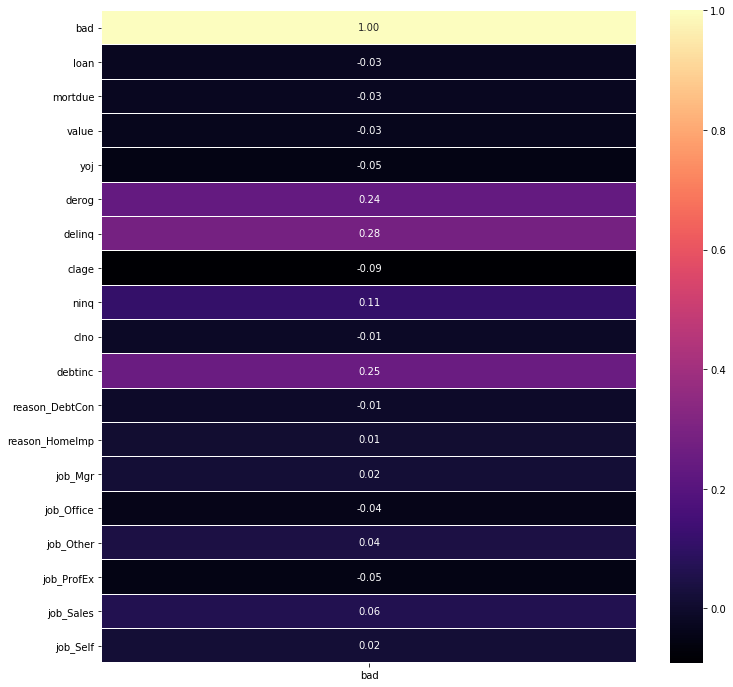

In [17]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr().iloc[:,0:1], ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


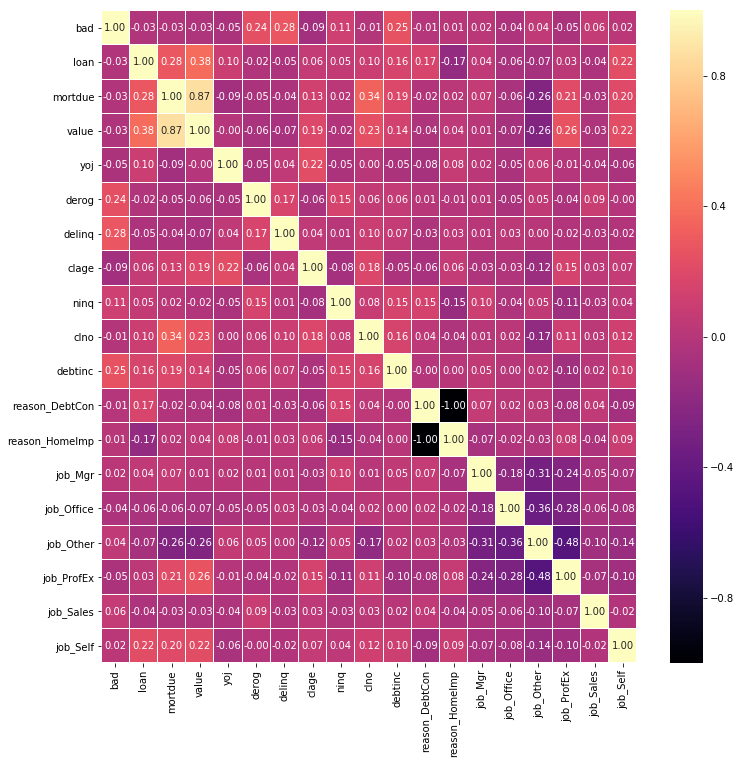

In [18]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr().iloc[:,:], ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


In [19]:
X = X.drop({"mortdue","clno","reason_DebtCon"}, axis =1)


In [20]:
X

,loan,value,yoj,derog,delinq,clage,ninq,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,18200,136877.0,15.0,0.0,0.0,168.96,2.0,36.056,0,1,0,0,0,0,0
1,21700,96784.0,5.0,0.0,0.0,64.51,6.0,38.079,0,1,0,0,0,0,0
2,34100,36486.0,1.0,0.0,2.0,196.01,3.0,42.459,0,1,0,0,0,0,0
3,8400,76718.0,3.0,0.0,2.0,131.47,0.0,29.200,1,1,0,0,0,0,0
4,17400,43684.0,16.0,1.0,0.0,95.36,1.0,27.108,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,7200,39660.0,6.0,0.0,1.0,354.24,3.0,33.624,1,0,0,0,0,0,1
2014,53400,305514.0,6.0,0.0,0.0,11.15,0.0,34.558,1,0,0,0,0,0,1
2015,27300,137727.0,3.0,0.0,0.0,300.57,3.0,32.560,0,0,0,0,0,0,1
2016,37300,86172.0,2.0,0.0,6.0,235.64,2.0,114.051,1,0,0,0,0,0,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size=0.20,random_state=42)


In [22]:
X_train2=X_train.copy()
X_test2=X_test.copy()


In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaler=mms.fit(X_train)
X_train=scaler.transform(X_train2)
X_train = pd.DataFrame(X_train, columns=X_train2.columns)
# X_train.reset_index(drop=True, inplace=True)

X_test=scaler.transform(X_test2)
X_test = pd.DataFrame(X_test, columns=X_test2.columns)
# X_test.reset_index(drop=True, inplace=True)

In [24]:
y_test

1556    0
526     0
393     0
1789    0
433     0
       ..
1112    0
693     0
1494    0
921     0
261     0
Name: bad, Length: 404, dtype: int64

In [25]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model
# saga daha büyük datasetlerde solver kullanılabilir. multiclass için değiştirilmesi lazım

LogisticRegression(solver='liblinear')

In [26]:
y_pred=loj_model.predict(X_test)


In [27]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.06      0.11        35

    accuracy                           0.92       404
   macro avg       0.96      0.53      0.53       404
weighted avg       0.93      0.92      0.88       404



In [28]:
y_pred=loj_model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)
# hasta olan insanları yarı yarıya tahmin ediyor kötü yani

array([[369,   0],
       [ 33,   2]], dtype=int64)

In [30]:
X_train.shape

(1614, 15)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1614, 15), (404, 15), (1614,), (404,))

In [32]:
loj=sm.Logit(X_train,y_train)
loj_model=loj.fit()
loj_model.summary()

ValueError: The indices for endog and exog are not aligned

In [33]:
X_train=X_train.drop(["value","yoj"],axis=1)
X_test=X_test.drop(["value","yoj"],axis=1)

In [67]:
X_train=X_train.drop(["reason_HomeImp"],axis=1)
X_test=X_test.drop(["reason_HomeImp"],axis=1)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [46]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
9,job_Other,8.218310
10,job_ProfEx,6.007313
8,job_Office,4.128125
7,job_Mgr,3.658431
12,job_Self,1.913617
11,job_Sales,1.353325
0,loan,1.126966
1,derog,1.098921
4,ninq,1.096828
6,reason_HomeImp,1.080091


In [34]:
from sklearn.metrics import confusion_matrix
def conf_mtrx(y_test, y_pred, model):    
    cm = confusion_matrix(y_test,y_pred)    
    f, ax = plt.subplots(figsize =(5,5))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax,cmap=plt.cm.RdPu)
    plt.xlabel("predicted y values")
    plt.ylabel("real y values")
    plt.title("\nConfusion Matrix")
    plt.show()

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score
def rc_recis_scres(y_test, y_pred, algorithm_name):
    rs=recall_score(y_test, y_pred) 
    ps=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    print("Recall Score of ", algorithm_name, "    : ",rs)
    print("Precision Score of ", algorithm_name, " : ",ps)
    print("F1 Score of ", algorithm_name, "        : ",f1)
    print()

In [36]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, label = roc_auc_score) 
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
def ML_Algorithms(X_train, X_test, y_train, y_test, alg_name, model):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    conf_mtrx(y_test, y_pred, model)
    print("*****",alg_name," ALGORITHM:") 
    rc_recis_scres(y_test, y_pred, alg_name)

    print("Score for ", alg_name," train set:"  ,  model.score(X_train,y_train))
    print("Score for ", alg_name, " test set: ", model.score(X_test,y_test))
    
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    y_probs = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    
    print()
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    plot_roc_curve(fpr, tpr)
    return y_pred

In [38]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=3)

X_train,y_train=sm.fit_sample(X_train,y_train.ravel())
np.bincount(y_train)
# Xtest1,ytest1=sm.fit_sample(Xtest1,ytest1.ravel())
# np.bincount(ytest1)

array([1471, 1471], dtype=int64)

In [39]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:

loj=LogisticRegression(C=0.1, random_state=42, max_iter=7)
model=loj.fit(X_train,y_train)
y_probs = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.



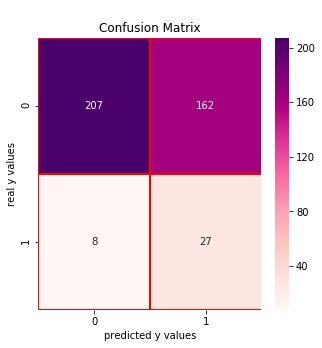

***** LOGISTIC REGRESSION  ALGORITHM:
Recall Score of  LOGISTIC REGRESSION     :  0.7714285714285715
Precision Score of  LOGISTIC REGRESSION  :  0.14285714285714285
F1 Score of  LOGISTIC REGRESSION         :  0.24107142857142855

Score for  LOGISTIC REGRESSION  train set: 0.6087695445275323
Score for  LOGISTIC REGRESSION  test set:  0.5792079207920792

AUC: 0.73


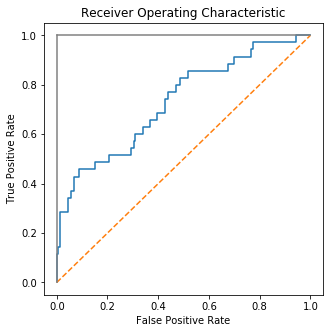

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [41]:
ML_Algorithms(X_train, X_test, y_train, y_test, "LOGISTIC REGRESSION", LogisticRegression(C=0.01, random_state=42, max_iter=7))

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2942, 13), (404, 13), (2942,), (404,))

In [83]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [115]:
accuracy_score(y_test,y_pred)

0.7747524752475248

In [42]:
print(classification_report(y_test,y_pred))
# herçekte hasta olanların %55 ini tahmin edebilmiş. Recall çok düşük

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       369
           1       0.20      0.54      0.29        35

    accuracy                           0.77       404
   macro avg       0.58      0.67      0.58       404
weighted avg       0.88      0.77      0.82       404



In [43]:
# unbalance durumlarda bagging kullanılabilir. 
# sentetik veri üretmek manipule edebilir.

In [48]:


confusion_matrix(y_test,y_pred)

array([[294,  75],
       [ 16,  19]], dtype=int64)

In [45]:
df.bad.value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [46]:
accuracy_score(y_test, y_pred)


0.7747524752475248

In [47]:
cross_val_score(model, X_test, y_test, cv = 10).mean()
# yukardaki accu_score ile yakın çıkması model genel olarak doğru 
# eğer farklı çıksaydı veri dağılımından kaynaklıbi sıkıntı var 

0.9134756097560978

# PCA

In [46]:
# PCA sürekli bağımsız değişkenlerin sayısını düşürmek için
# birbirine dik olan eigenvector ler oluşturulur

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [50]:
pca=PCA() 
X_reduced_train=pca.fit_transform(scale(X_train))
lm=LogisticRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [51]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)


array([ 14.07,  26.6 ,  37.01,  46.86,  56.02,  64.48,  72.34,  79.58,
        85.72,  90.71,  95.46, 100.01, 100.01])

In [6]:
x_reduced_train=pca.fit_transform(scale(X_train))
x_reduced_train[0:1,:]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [67]:
pca=PCA(n_components=4)
x_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_test=pca.transform(scale(X_test))


In [68]:
from sklearn.linear_model import LinearRegression
lm=lm=LogisticRegression()
pcr_model=lm.fit(x_reduced_train,y_train)

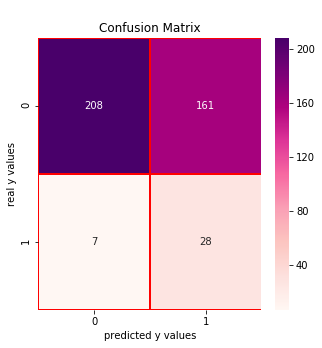

***** LOGISTIC REGRESSION  ALGORITHM:
Recall Score of  LOGISTIC REGRESSION     :  0.8
Precision Score of  LOGISTIC REGRESSION  :  0.14814814814814814
F1 Score of  LOGISTIC REGRESSION         :  0.25

Score for  LOGISTIC REGRESSION  train set: 0.6628144119646499
Score for  LOGISTIC REGRESSION  test set:  0.5841584158415841

AUC: 0.79


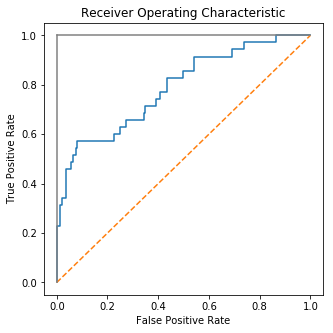

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [69]:
ML_Algorithms(x_reduced_train, X_reduced_test, y_train, y_test, "LOGISTIC REGRESSION", LogisticRegression(C=0.01, random_state=42, max_iter=7))